In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
results_path = '/home/nickbarry/Documents/MsC-DS/Data_Science_Research_Project/Coresets/Data/pmw_adaptive_random_results.csv'
df = pd.read_csv(results_path)

In [5]:
df.to_csv('/home/nickbarry/Documents/MsC-DS/Data_Science_Research_Project/Coresets/Repositories/HRNet-Semantic-Segmentation-Coreset/analysis/plot_csv/section_5/figure_5_7_2.csv')

In [3]:
df.corr()

,class,inv_oracle_weigthing,train_set_prop,adaptive_random,oracle_bs_0,oracle_bs_003,oracle_bs_00113,invprop_bs_0
class,1.000000,0.028685,0.129154,0.029337,0.086750,0.049755,0.076584,0.084674
inv_oracle_weigthing,0.028685,1.000000,0.585507,0.985128,0.575939,0.967228,0.974949,0.497533
train_set_prop,0.129154,0.585507,1.000000,0.550927,0.329179,0.571190,0.587279,0.269873
adaptive_random,0.029337,0.985128,0.550927,1.000000,0.579040,0.956896,0.968939,0.501592
oracle_bs_0,0.086750,0.575939,0.329179,0.579040,1.000000,0.574936,0.571560,0.991741
oracle_bs_003,0.049755,0.967228,0.571190,0.956896,0.574936,1.000000,0.993775,0.494104
oracle_bs_00113,0.076584,0.974949,0.587279,0.968939,0.571560,0.993775,1.000000,0.491556
invprop_bs_0,0.084674,0.497533,0.269873,0.501592,0.991741,0.494104,0.491556,1.000000


In [4]:
oracle_runs = df[['class', 'inv_oracle_weigthing', 'adaptive_random','oracle_bs_0', 'oracle_bs_003', 'oracle_bs_00113']]
oracle_runs = oracle_runs.melt(id_vars=['class', 'inv_oracle_weigthing', 'adaptive_random'], var_name='run', value_name='mIoU')

oracle_runs['oracle_weigthing'] = 1 / oracle_runs['inv_oracle_weigthing']
oracle_runs['norm_delta'] = (oracle_runs['mIoU'] - oracle_runs['adaptive_random'])  / oracle_runs['mIoU']

inv_prop_runs = df[['class', 'train_set_prop', 'adaptive_random','invprop_bs_0']]
inv_prop_runs['class_weighting'] = 1 / inv_prop_runs['train_set_prop']
inv_prop_runs['norm_delta'] = (inv_prop_runs['invprop_bs_0'] - inv_prop_runs['adaptive_random'])  / inv_prop_runs['invprop_bs_0']


/tmp/ipykernel_864440/1278400726.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inv_prop_runs['class_weighting'] = 1 / inv_prop_runs['train_set_prop']
/tmp/ipykernel_864440/1278400726.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inv_prop_runs['norm_delta'] = (inv_prop_runs['invprop_bs_0'] - inv_prop_runs['adaptive_random'])  / inv_prop_runs['invprop_bs_0']


Text(0.5, 1.0, 'Oracle Class Weighting Experiment')

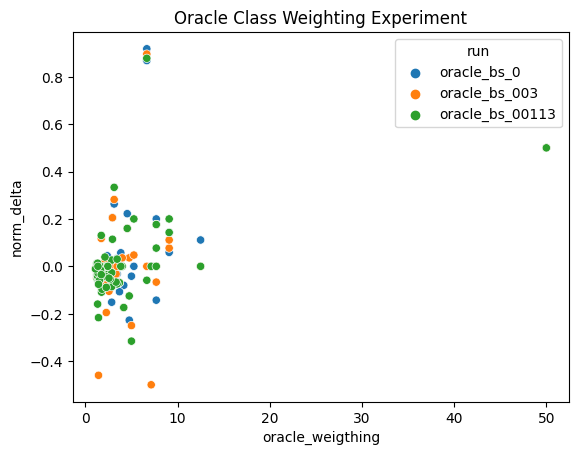

In [5]:
plt = sns.scatterplot(data=oracle_runs, x='oracle_weigthing', y='norm_delta', hue='run')
plt.set_title('Oracle Class Weighting Experiment')

Text(0.5, 1.0, 'Oracle Class Weighting Experiment KDE')

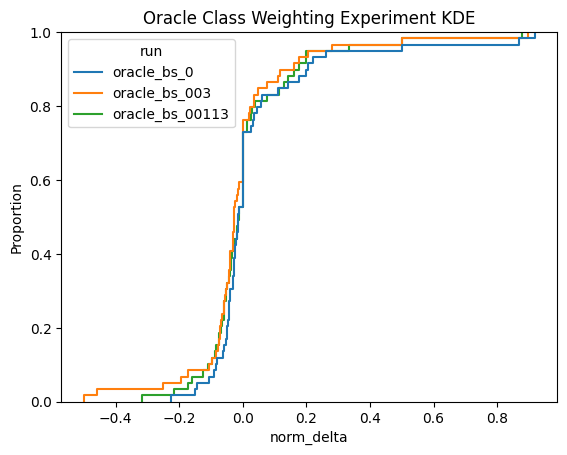

In [6]:
plt = sns.ecdfplot(data=oracle_runs, x='norm_delta', hue='run')
plt.set_title('Oracle Class Weighting Experiment KDE')

Text(0.5, 1.0, 'Training Set Pixel-wise Proportions Class Weighting Experiment')

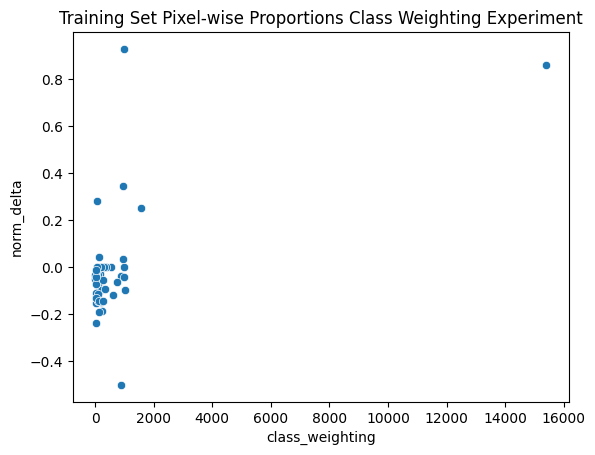

In [7]:
plt = sns.scatterplot(data=inv_prop_runs, x='class_weighting', y='norm_delta')
plt.set_title('Training Set Pixel-wise Proportions Class Weighting Experiment')

In [8]:
oracle_runs

,class,inv_oracle_weigthing,adaptive_random,run,mIoU,oracle_weigthing,norm_delta
0,0,0.77,0.79,oracle_bs_0,0.77,1.298701,-0.025974
1,1,0.13,0.12,oracle_bs_0,0.15,7.692308,0.200000
2,2,0.08,0.08,oracle_bs_0,0.09,12.500000,0.111111
3,3,0.24,0.27,oracle_bs_0,0.25,4.166667,-0.080000
4,4,0.02,0.03,oracle_bs_0,0.06,50.000000,0.500000
...,...,...,...,...,...,...,...
172,54,0.70,0.71,oracle_bs_00113,0.66,1.428571,-0.075758
173,55,0.58,0.60,oracle_bs_00113,0.69,1.724138,0.130435
174,56,0.70,0.73,oracle_bs_00113,0.60,1.428571,-0.216667
175,57,0.29,0.32,oracle_bs_00113,0.33,3.448276,0.030303
